#### *Number of Police Incidents by Neighborhood, 2023* - **Kambin Zarei**
##### [Link to Data](https://data.wprdc.org/dataset/uniform-crime-reporting-data)

The sub-metric that I will discuss in this notebook is the number of police incidents in Pittsburgh neighborhoods from **Jan-Aug 2023**. This sub-metric will be constructed using the "Incidents.csv" file in this notebook's repository. The program below will use the "**Pandas**" and "**matplotlib**" Python libraries to manipulate and visualize the dataset in question. I have selected this sub-metric because safety can give us insight on the quality of life in a certain neighborhood. 

Note: I will **not take population into consideration** when examining the dataset. 

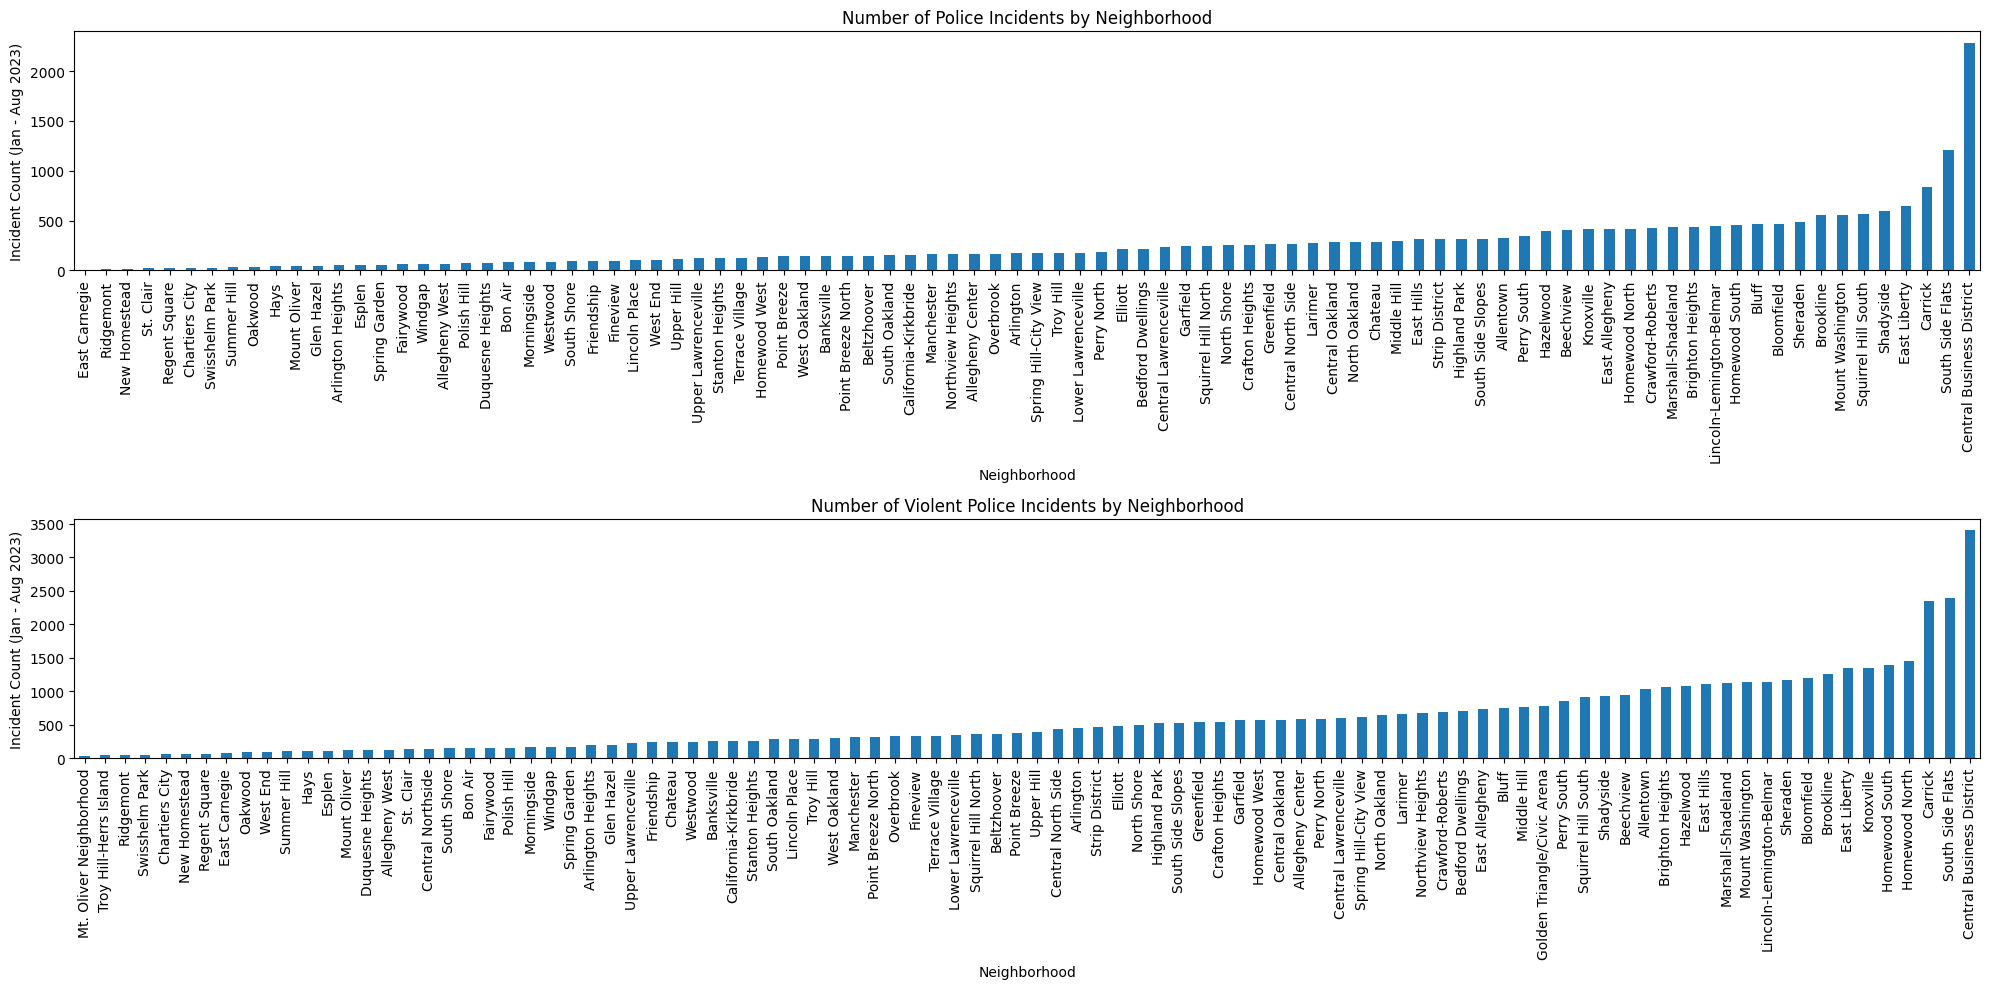

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 

VIOLENT_CRIMES_KWORDS = ["AGG", "ASSAULT", "ARSON","RAPE", "KIDNAPPING", "THREAT",
                  "INTIM", "HARRASSMENT", "SEX", "ABUSE", "MURDER", "ROBBERY",
                  "EXTORTION"] 

# Query masks and graph titles for the two series that will be created
SERIES = {
    "all_incidents": {
        "mask": {
            "col": "INCIDENTTIME",
            "args": {"pat": "2023"}
        },
        "graph_title": "Number of Police Incidents by Neighborhood"
    },

    "violent_incidents": {
        "mask": {
            "col": "INCIDENTHIERARCHYDESC", 
            "args": {
                "pat": "|".join(VIOLENT_CRIMES_KWORDS), 
                "na": False,
            }
        },

        "graph_title": "Number of Violent Police Incidents by Neighborhood"
    },
}


def main():
    # Create dataframe
    incidents = pd.read_csv("Incidents.csv")        
    # Create series containing incident counts
    counts_series = create_series(incidents)
    # Plot series as bar graph subplots
    visualize_data(counts_series)
    

def create_series(incs):
    # Store the two series in this dictionary (keys will be the same as those found in the 
    # SERIES global dictionary)
    counts_series = {}

    # Remove incidents that occurred outside our area of interest
    location_mask = ~incs.INCIDENTNEIGHBORHOOD.str.contains("Outside", na=False)

    for k, v in SERIES.items(): 
        # Set dataframe column and arguments for str.contains()
        col = v["mask"]["col"]
        args = v["mask"]["args"]

        # Remove incidents that occurred before 2023
        val_mask = incs[col].str.contains(**args)
        # Create new dataframe with query masks
        tab = incs[val_mask & location_mask]
        
        # Count number of incidents for each neighborhood and transform table to series
        s = tab.pivot_table(
            index=["INCIDENTNEIGHBORHOOD"],
            aggfunc="size"
        )

        # Remove unnecessary element from series
        s.pop("Mt. Oliver Boro")

        # Sort the newly created series
        counts_series[k] = s.sort_values(ascending=True)

    return counts_series

def visualize_data(series):
    # Subplot axis counter
    i = 0
    # Create subplots (2 rows, 1 column)
    fig, axes = plt.subplots(2)
    
    # Plot the two series
    for k, s in series.items(): 
        s.plot.bar(
            ax=axes[i],
            xlabel = "Neighborhood",
            ylabel = "Incident Count (Jan - Aug 2023)",
            title = SERIES[k]["graph_title"],
            # Figure size with x = 20 to prevent bar names from 
            # overlapping
            figsize = (20,10)
        )
        
        # Increment axis counter
        i += 1

    # Prevent issues with (visual) overlap between the two plots
    fig.tight_layout()
    return 

main()


The *first subplot* pertains to *all* police incidents and the *second subplot* pertains to *violent* incidents only (as defined by the keywords in the global dictionary "VIOLENT_CRIME_KWORDS"). Both plots count incidents that occured between **January 2023 and August 2023**. The subplots, which are sorted in ascending order, reveal that East Carnegie contained the least amount of total incidents and Mt. Oliver (the neighborhood) contained the least amount of violent incidents in 2023. In addition, the subplots show that Central Business District contained the greatest amount of total and the greatest amount of strictly violent incidents in 2023.

From these observations, I conclude that **Mt. Oliver Neighborhood** is the best neighborhood in Pittsburgh because the least amount of violent crimes have occurred in this neighborhood. As mentioned previously, this sub-metric does not take population into consideration, so I would probably come to a different conclusion if I were to analyze the crime rate instead.